In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [3]:
df = pd.read_csv("/content/homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


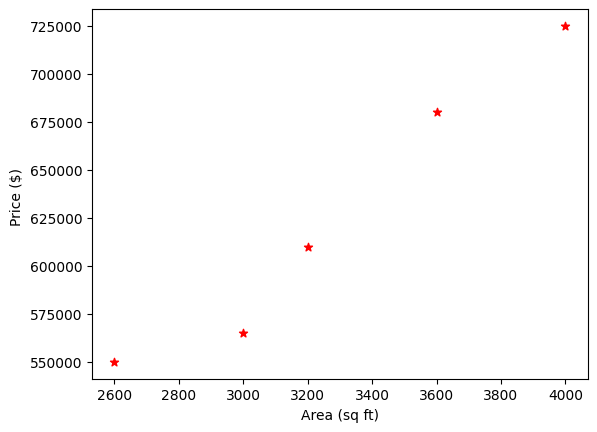

In [16]:
%matplotlib inline
plt.scatter(df.area,df.price, marker="*", color="red")
plt.xlabel("Area (sq ft)")
plt.ylabel("Price ($) ")
plt.show()

In [29]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']], df.price)

LinearRegression()

In [32]:
reg.predict([[3300]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

y = mx+b where m = coef and b = intercept

In [33]:
reg.coef_

array([135.78767123])

In [34]:
reg.intercept_

np.float64(180616.43835616432)

In [35]:
(135.78767123*3300) + 180616.43835616432

628715.7534151643

Yes, they both match

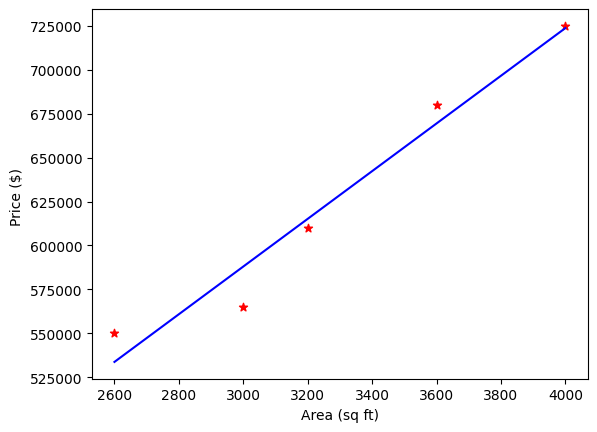

In [52]:
%matplotlib inline
plt.scatter(df.area,df.price, marker="*", color="red")
plt.xlabel("Area (sq ft)")
plt.ylabel("Price ($) ")
plt.plot(df.area, reg.predict(df[['area']]), color="blue")
plt.show()

In [42]:
df2 = pd.read_csv("/content/areas.csv")
df2

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [44]:
p = reg.predict(df2)
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [47]:
df2['prices'] = p
df2

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


Exercise: Now we are going to predict Canada's per capita income in 2020 given the dataset

In [66]:
df3 = pd.read_csv("/content/canada_per_capita_income.csv")
df3

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


In [55]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     47 non-null     int64  
 1   per capita income (US$)  47 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 884.0 bytes


In [59]:
reg_canada = linear_model.LinearRegression()
reg_canada.fit(df3[['year']], df3['per capita income (US$)'])

LinearRegression()

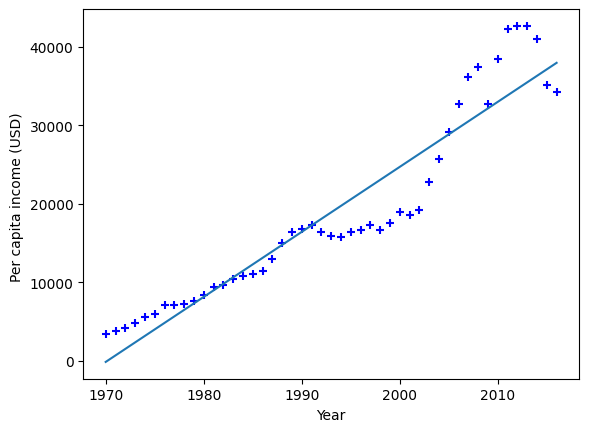

In [62]:
%matplotlib inline
plt.scatter(df3.year,df3['per capita income (US$)'], marker="+", color="blue")
plt.xlabel("Year")
plt.ylabel("Per capita income (USD) ")
plt.plot(df3.year, reg_canada.predict(df3[['year']]))
plt.show()

In [65]:
reg_canada.predict([[2020]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

The model predicted that the per capital income in Canada in 2020 was about $41288.
In real life, the amount was approximately 43,570.
This shows that the model was really close to the actual number